In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils

from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, GlobalAveragePooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [ ]:
from matplotlib.cbook import flatten
model = keras.Sequential([
    keras.Input(shape=(32,32,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),

    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
num_classes=10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

In [ ]:
datagen = ImageDataGenerator(featurewise_center=False,
                            samplewise_center=False,
                            featurewise_std_normalization=False,
                            samplewise_std_normalization=False,
                            zca_whitening=False,
                            rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True,
                            vertical_flip=False)

datagen.fit(X_train)

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss= keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [ ]:
h = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 128),
                    steps_per_epoch = len(X_train) // 128, 
                    epochs = 10, 
                    validation_data= (X_valid, y_valid),
                    verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
312/312 [==============================] - 26s 82ms/step - loss: 0.9482 - accuracy: 0.6643 - val_loss: 0.8071 - val_accuracy: 0.7163
Epoch 2/10
312/312 [==============================] - 26s 82ms/step - loss: 0.9311 - accuracy: 0.6701 - val_loss: 0.7981 - val_accuracy: 0.7174
Epoch 3/10
312/312 [==============================] - 25s 81ms/step - loss: 0.9069 - accuracy: 0.6798 - val_loss: 1.0891 - val_accuracy: 0.6248
Epoch 4/10
312/312 [==============================] - 25s 80ms/step - loss: 0.8993 - accuracy: 0.6818 - val_loss: 0.9774 - val_accuracy: 0.6552
Epoch 5/10
312/312 [==============================] - 25s 80ms/step - loss: 0.8900 - accuracy: 0.6869 - val_loss: 0.7585 - val_accuracy: 0.7373
Epoch 6/10
312/312 [==============================] - 26s 83ms/step - loss: 0.8737 - accuracy: 0.6917 - val_loss: 0.8697 - val_accuracy: 0.6994
Epoch 7/10
312/312 [==============================] - 25s 81ms/step - loss: 0.8572 - accuracy: 0.6964 - val_loss: 0.8373 - val_accuracy:

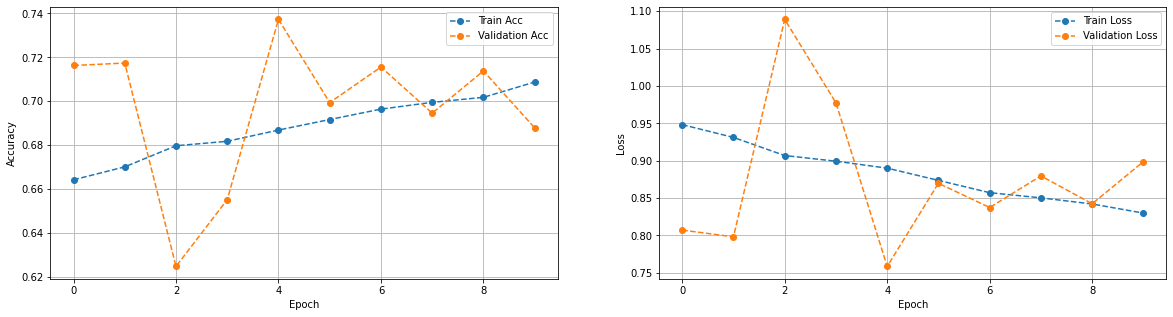

In [ ]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [ ]:
h = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 128),
                    steps_per_epoch = len(X_train) // 128, 
                    epochs = 15, 
                    validation_data= (X_valid, y_valid),
                    verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/15
312/312 [==============================] - 26s 82ms/step - loss: 0.8219 - accuracy: 0.7106 - val_loss: 0.6952 - val_accuracy: 0.7591
Epoch 2/15
312/312 [==============================] - 25s 81ms/step - loss: 0.8116 - accuracy: 0.7141 - val_loss: 0.8290 - val_accuracy: 0.7110
Epoch 3/15
312/312 [==============================] - 25s 81ms/step - loss: 0.8165 - accuracy: 0.7113 - val_loss: 0.7413 - val_accuracy: 0.7422
Epoch 4/15
312/312 [==============================] - 25s 80ms/step - loss: 0.7974 - accuracy: 0.7184 - val_loss: 0.7283 - val_accuracy: 0.7473
Epoch 5/15
312/312 [==============================] - 25s 79ms/step - loss: 0.7939 - accuracy: 0.7218 - val_loss: 0.7644 - val_accuracy: 0.7332
Epoch 6/15
312/312 [==============================] - 25s 80ms/step - loss: 0.7867 - accuracy: 0.7247 - val_loss: 0.8371 - val_accuracy: 0.7088
Epoch 7/15
312/312 [==============================] - 25s 80ms/step - loss: 0.7836 - accuracy: 0.7271 - val_loss: 0.9718 - val_accuracy:

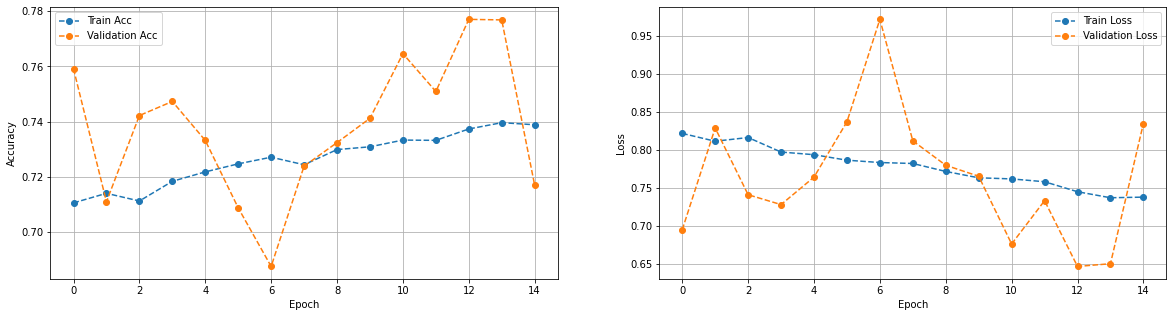

In [ ]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [ ]:
h = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 128),
                    steps_per_epoch = len(X_train) // 128, 
                    epochs = 20, 
                    validation_data= (X_valid, y_valid),
                    verbose=1)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


312/312 [==============================] - 25s 79ms/step - loss: 0.7415 - accuracy: 0.7401 - val_loss: 0.7733 - val_accuracy: 0.7334
Epoch 2/20
312/312 [==============================] - 24s 78ms/step - loss: 0.7357 - accuracy: 0.7410 - val_loss: 0.6820 - val_accuracy: 0.7624
Epoch 3/20
312/312 [==============================] - 25s 80ms/step - loss: 0.7281 - accuracy: 0.7439 - val_loss: 0.6225 - val_accuracy: 0.7873
Epoch 4/20
312/312 [==============================] - 25s 80ms/step - loss: 0.7283 - accuracy: 0.7453 - val_loss: 0.6663 - val_accuracy: 0.7721
Epoch 5/20
312/312 [==============================] - 24s 78ms/step - loss: 0.7195 - accuracy: 0.7477 - val_loss: 0.9084 - val_accuracy: 0.6921
Epoch 6/20
312/312 [==============================] - 25s 80ms/step - loss: 0.7141 - accuracy: 0.7488 - val_loss: 0.6922 - val_accuracy: 0.7662
Epoch 7/20
312/312 [==============================] - 24s 78ms/step - loss: 0.7193 - accuracy: 0.7471 - val_loss: 0.6456 - val_accuracy: 0.7809
Epo

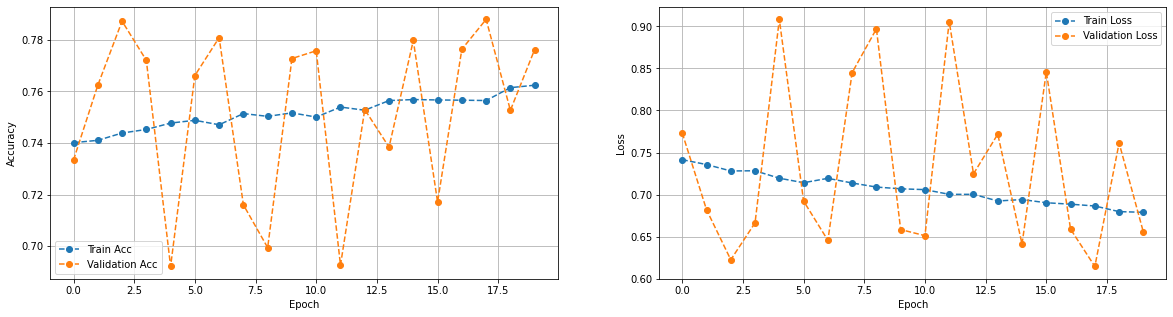

In [ ]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [ ]:
h = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 128),
                    steps_per_epoch = len(X_train) // 128, 
                    epochs = 25, 
                    validation_data= (X_valid, y_valid),
                    verbose=1)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


312/312 [==============================] - 26s 84ms/step - loss: 0.6845 - accuracy: 0.7607 - val_loss: 0.7829 - val_accuracy: 0.7409
Epoch 2/25
312/312 [==============================] - 25s 80ms/step - loss: 0.6810 - accuracy: 0.7621 - val_loss: 0.6183 - val_accuracy: 0.7860
Epoch 3/25
312/312 [==============================] - 25s 79ms/step - loss: 0.6752 - accuracy: 0.7655 - val_loss: 0.7069 - val_accuracy: 0.7585
Epoch 4/25
312/312 [==============================] - 25s 79ms/step - loss: 0.6682 - accuracy: 0.7660 - val_loss: 0.5911 - val_accuracy: 0.7949
Epoch 5/25
312/312 [==============================] - 25s 79ms/step - loss: 0.6629 - accuracy: 0.7659 - val_loss: 0.5983 - val_accuracy: 0.7877
Epoch 6/25
312/312 [==============================] - 25s 81ms/step - loss: 0.6637 - accuracy: 0.7684 - val_loss: 0.6308 - val_accuracy: 0.7846
Epoch 7/25
312/312 [==============================] - 26s 82ms/step - loss: 0.6657 - accuracy: 0.7666 - val_loss: 0.5738 - val_accuracy: 0.8011
Epo

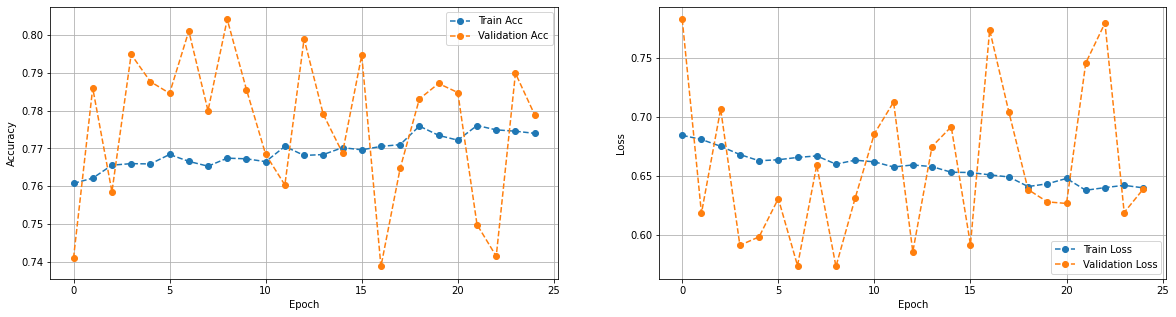

In [ ]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [ ]:
h = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 128),
                    steps_per_epoch = len(X_train) // 128, 
                    epochs = 30, 
                    validation_data= (X_valid, y_valid),
                    verbose=1)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


312/312 [==============================] - 25s 79ms/step - loss: 0.6315 - accuracy: 0.7775 - val_loss: 0.6635 - val_accuracy: 0.7783
Epoch 2/30
312/312 [==============================] - 26s 83ms/step - loss: 0.6395 - accuracy: 0.7762 - val_loss: 0.6490 - val_accuracy: 0.7764
Epoch 3/30
312/312 [==============================] - 24s 78ms/step - loss: 0.6299 - accuracy: 0.7776 - val_loss: 0.5540 - val_accuracy: 0.8091
Epoch 4/30
312/312 [==============================] - 25s 80ms/step - loss: 0.6355 - accuracy: 0.7753 - val_loss: 0.6109 - val_accuracy: 0.7924
Epoch 5/30
312/312 [==============================] - 25s 80ms/step - loss: 0.6236 - accuracy: 0.7795 - val_loss: 0.6556 - val_accuracy: 0.7827
Epoch 6/30
312/312 [==============================] - 25s 79ms/step - loss: 0.6349 - accuracy: 0.7760 - val_loss: 0.6784 - val_accuracy: 0.7686
Epoch 7/30
312/312 [==============================] - 25s 79ms/step - loss: 0.6324 - accuracy: 0.7785 - val_loss: 0.5867 - val_accuracy: 0.7970
Epo

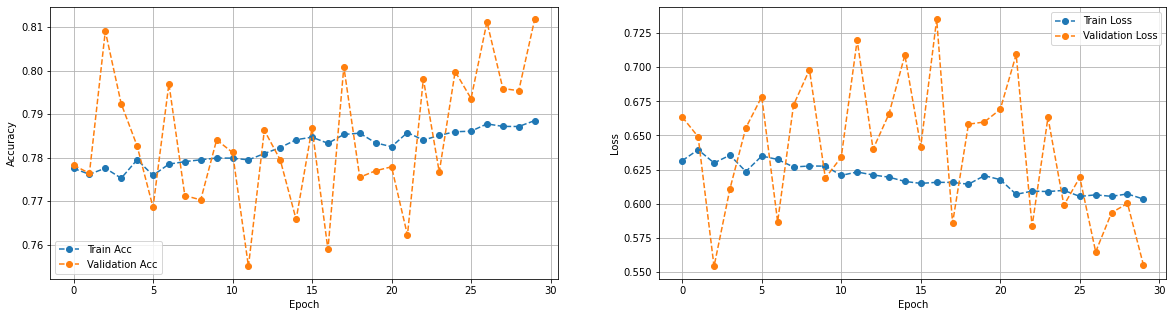

In [ ]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [ ]:
h = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 128),
                    steps_per_epoch = len(X_train) // 128, 
                    epochs = 35, 
                    validation_data= (X_valid, y_valid),
                    verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/35
312/312 [==============================] - 31s 100ms/step - loss: 0.6043 - accuracy: 0.7883 - val_loss: 0.7132 - val_accuracy: 0.7616
Epoch 2/35
312/312 [==============================] - 31s 98ms/step - loss: 0.6055 - accuracy: 0.7862 - val_loss: 0.5848 - val_accuracy: 0.7998
Epoch 3/35
312/312 [==============================] - 27s 85ms/step - loss: 0.5964 - accuracy: 0.7893 - val_loss: 0.6380 - val_accuracy: 0.7890
Epoch 4/35
312/312 [==============================] - 25s 79ms/step - loss: 0.6046 - accuracy: 0.7872 - val_loss: 0.6886 - val_accuracy: 0.7708
Epoch 5/35
312/312 [==============================] - 25s 80ms/step - loss: 0.6019 - accuracy: 0.7885 - val_loss: 0.6047 - val_accuracy: 0.7963
Epoch 6/35
312/312 [==============================] - 25s 80ms/step - loss: 0.6015 - accuracy: 0.7863 - val_loss: 0.6587 - val_accuracy: 0.7831
Epoch 7/35
312/312 [==============================] - 25s 80ms/step - loss: 0.6037 - accuracy: 0.7885 - val_loss: 0.5976 - val_accuracy

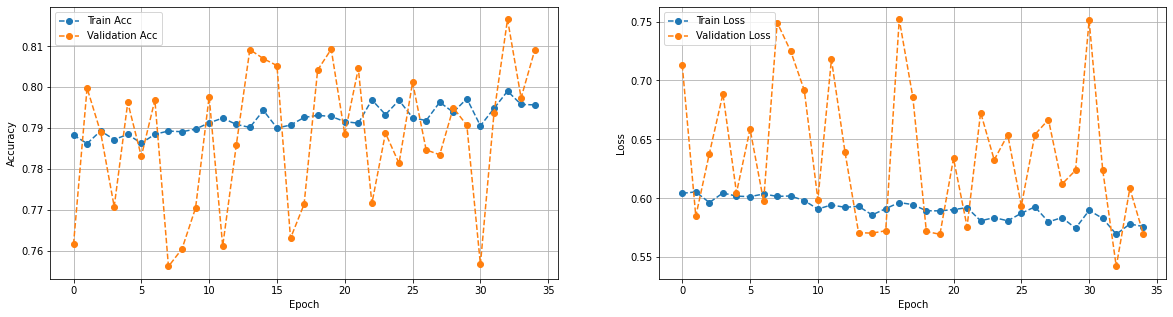

In [ ]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [ ]:
h = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 128),
                    steps_per_epoch = len(X_train) // 128, 
                    epochs = 40, 
                    validation_data= (X_valid, y_valid),
                    verbose=1)

Epoch 1/40


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


312/312 [==============================] - 27s 85ms/step - loss: 0.5763 - accuracy: 0.7980 - val_loss: 0.5991 - val_accuracy: 0.7983
Epoch 2/40
312/312 [==============================] - 26s 82ms/step - loss: 0.5756 - accuracy: 0.7973 - val_loss: 0.5872 - val_accuracy: 0.8048
Epoch 3/40
312/312 [==============================] - 26s 83ms/step - loss: 0.5758 - accuracy: 0.7974 - val_loss: 0.5587 - val_accuracy: 0.8113
Epoch 4/40
312/312 [==============================] - 25s 80ms/step - loss: 0.5811 - accuracy: 0.7952 - val_loss: 0.6413 - val_accuracy: 0.7836
Epoch 5/40
312/312 [==============================] - 25s 80ms/step - loss: 0.5728 - accuracy: 0.7969 - val_loss: 0.5092 - val_accuracy: 0.8250
Epoch 6/40
312/312 [==============================] - 25s 81ms/step - loss: 0.5768 - accuracy: 0.7946 - val_loss: 0.6150 - val_accuracy: 0.7927
Epoch 7/40
312/312 [==============================] - 25s 80ms/step - loss: 0.5733 - accuracy: 0.7954 - val_loss: 0.6566 - val_accuracy: 0.7839
Epo

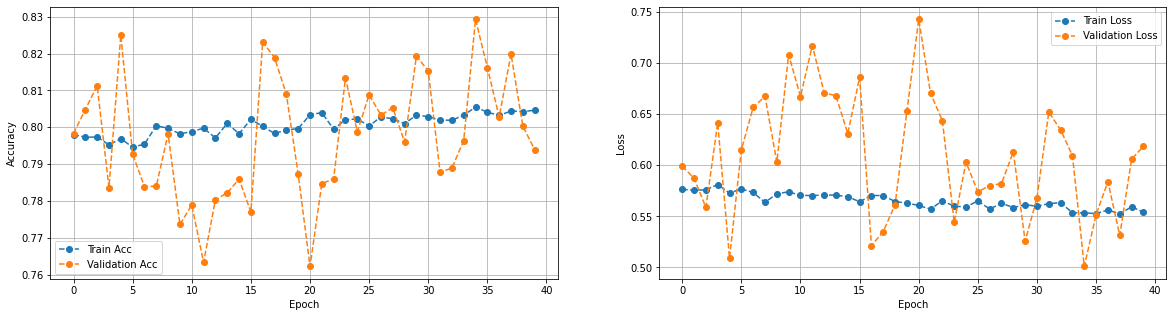

In [ ]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()